#  Sampling Plans

This section provides implementation for concepts related to sampling plans. Following topics are covered in this section:

1. Full factorial sampling
2. Latin hypercube sampling
3. Halton sequences

Refer to the lecture notes for more details about sampling plans.

> **_NOTE:_** You need to install [pyDOE3](https://pydoe3.readthedocs.io/en/latest/) which is a python-based library for creating sampling plans. Open anaconda prompt and activate the environment you created for this class, and install pyDOE3 using `pip install pyDOE3`.

Below block of code imports required packages:

In [16]:
import numpy as np
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from pyDOE3 import fullfact, lhs, halton_sequence

## Full Factorial Sampling

First, we will look at full factorial sampling. You can read about how to use `pyDOE3` for generating full-factorial samples in their [documentation](https://pydoe3.readthedocs.io/en/latest/reference/factorial/). Below block of code generates full-factorial samples for *two* dimensional design space and plots it. Read comments in the code block for more details.

> __NOTE:__ When generating full-factorial samples, the number of samples grow exponentially with the number of input parameters. For example, if you have 3 input parameters, each with 3 levels, then the total number of samples will be 3^3 = 27. This can quickly become infeasible for large number of input parameters or levels. Here, level refers to the number of samples along a specific input parameter.

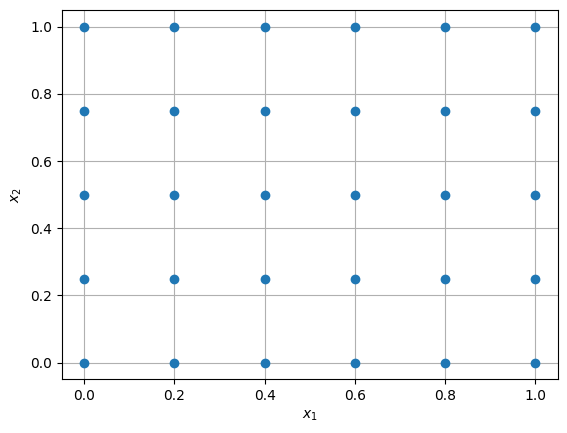

In [60]:
levels = np.array([6,5]) # number of factors in each dimension

x = fullfact(levels) # generating the design matrix

x = x / (levels - 1) # converting the matrix to sampling plan within unit hypercube

# plotting
fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()

The samples are generated in a grid-like fashion. As defined in the code, there are 6 and 5 levels (samples) along $x_1$ and $x_2$ dimension, respectively.

> __NOTE:__ `fullfact` function returns a design matrix which is not the final sampling plan. As described in the code, you need to perform one more step to obtain sampling plan within unit hypercube space.

Below code block scales the samples generated in previous block to a given design space:

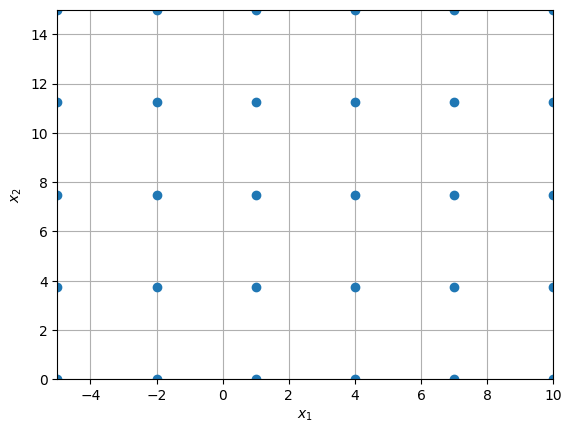

In [61]:
lb = np.array([-5, 0]) # lower bound

ub = np.array([10, 15]) # upper bound

x_scaled = lb + (ub - lb) * x # scale the samples

# plotting
fig, ax = plt.subplots()
ax.plot(x_scaled[:, 0], x_scaled[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()
ax.set_xlim(left=lb[0], right=ub[0])
_ = ax.set_ylim(bottom=lb[1], top=ub[1])

Now, you can see that samples are scaled to given bounds instead of unit square.

## Latin Hypercube Sampling

Now, we will look into latin hypercube (LH) sampling. You can read about how to use `pyDOE3` for generating LH samples in their [documentation](https://pydoe3.readthedocs.io/en/latest/reference/randomized/#latin-hypercube). 

The `lhs` function has a bunch of arguments, some of which are listed below:

1. `n`: number of dimensions
2. `samples`: (optional, default=n) number of samples to generate
3. `criterion`: (optional, default="c") method used to generate LH samples
4. `iterations`: (optional, default=100) number of iterations to perform while maximizing the distance criterion
5. `seed`: (optional, int) used to fix the randomness while generating samples for reproducibility

Following are some options for `criterion` argument:

1. `center` or `c` (default) - center of the strata
2. `maximin` or `m` - maximize the minimum distance between samples (based on heuristics, no optimization is performed)
3. `centermaximin` or `cm` - combination of `c` and `maximin`

Goodness of a sampling plan can be measured using an extension of **maximin distance** criterion proposed by [Morris et al. (1995)](https://www.sciencedirect.com/science/article/pii/037837589400035T). For a sampling plan, all the pairwise distance between samples are calculated and sorted to get a distance list ($d_1$, $d_2$, ..., $d_s$) and  index list ($J_1$, $J_2$, ..., $J_s$), where $d_i$'s are distinct distance values with $d_1 < d_2 < \dots < d_s$, $J_i$'s are the number of pairs of samples with distance $d_i$. Then, maximin distance criterion by Morris et al. is calculated using the following formula:

$$  
    \phi_p = \Bigg [ \sum_{i=1}^{s} J_i d_i^{-p} \Bigg ]^{1/p}
$$

where, $p$ is a positive integer. Smaller the value of $\phi_p$, more space-filling the sampling plan.

Below block of code generates LH samples for *two* dimensional design space, plots it, and computes $\phi_p$ value. Read comments in the code block for more details.

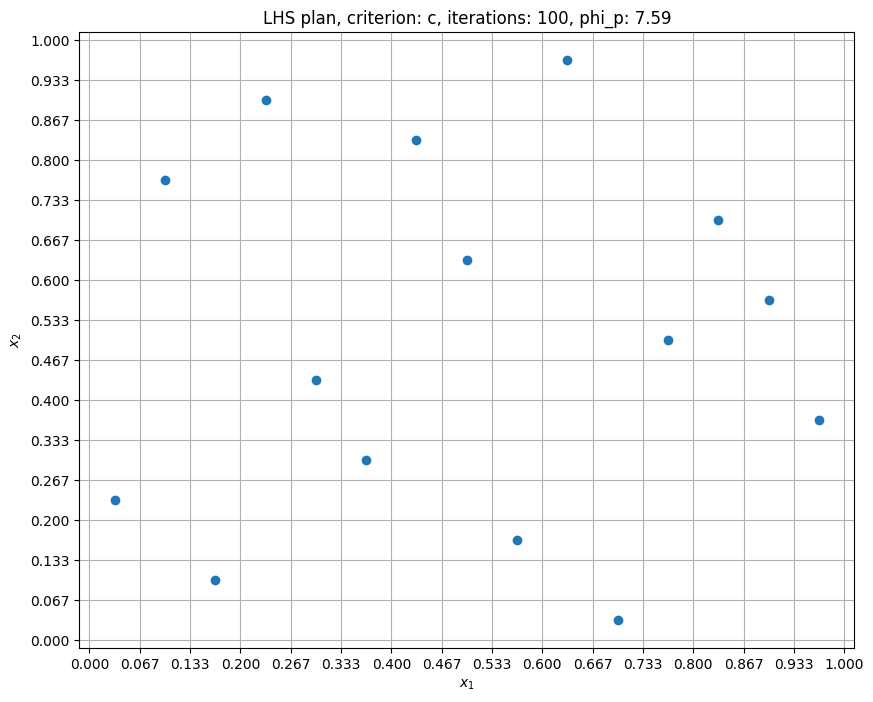

In [ ]:
criterion = "c"
iterations = 100
samples = 15
p = 10

x = lhs(n=2, samples=samples, criterion=criterion, iterations=iterations, seed=10)

phi_p = ((pdist(x) ** (-p)).sum()) ** (1.0 / p) # compute maximin criterion

# plotting
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.xticks(np.linspace(0, 1, samples+1))
plt.yticks(np.linspace(0, 1, samples+1))
ax.set_title(f"LHS plan, criterion: {criterion}, iterations: {iterations}, phi_p: {phi_p:0.2f}")
ax.grid()

Here, the samples are distributed in a more random fashion as compared to full-factorial samples. Note that samples are generated within unit hypercube, you will have to scale the generated sampling plan to desired bounds (shown in full factorial sampling section). In the next block, criterion is set to `cm`:

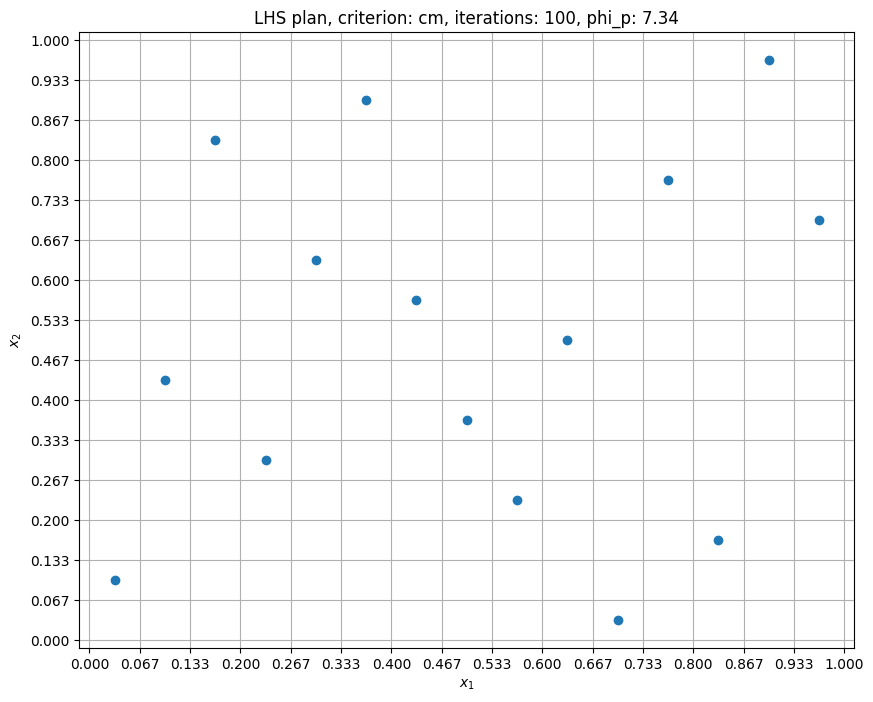

In [ ]:
criterion = "cm"
samples = 15
iterations = 100
p = 10

x = lhs(n=2, samples=samples, criterion=criterion, iterations=iterations, seed=10) 

phi_p = ((pdist(x) ** (-p)).sum()) ** (1.0 / p) # compute maximin criterion

# plotting
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.xticks(np.linspace(0, 1, samples+1))
plt.yticks(np.linspace(0, 1, samples+1))
ax.set_title(f"LHS plan, criterion: {criterion}, iterations: {iterations}, phi_p: {phi_p:0.2f}")
ax.grid()

Now, the samples are spread out more since `cm` criterion is using heuristics to maximize the minimum distance between samples. Accordingly, the $\phi_p$ value is reduced. In the next block, number of iterations is increased to 1000.

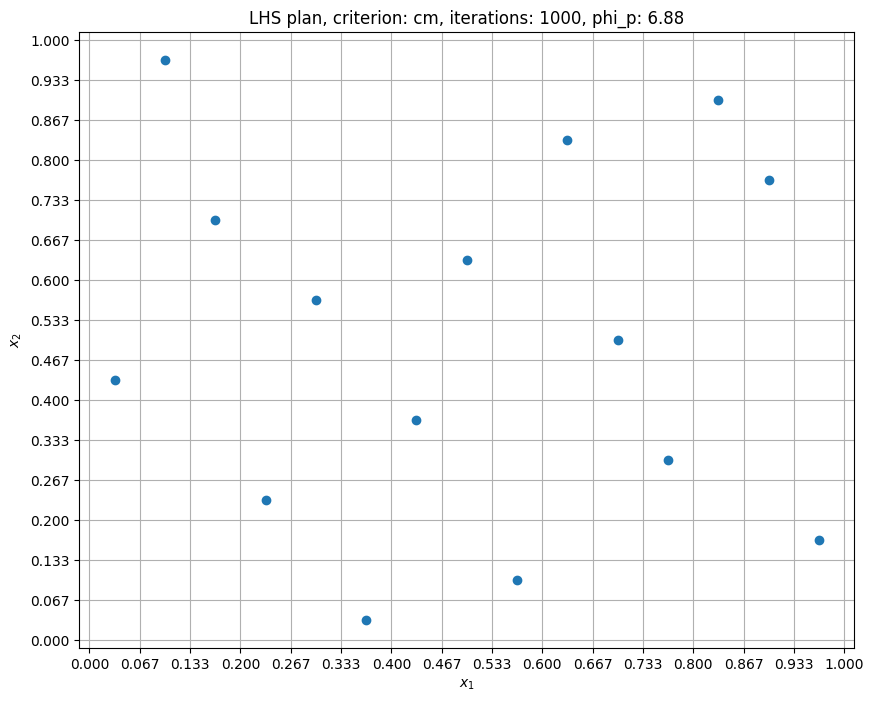

In [ ]:
criterion = "cm"
samples = 15
iterations = 1000
p = 10

x = lhs(n=2, samples=samples, criterion=criterion, iterations=iterations, seed=10)

phi_p = ((pdist(x) ** (-p)).sum()) ** (1.0 / p) # compute maximin criterion

# plotting
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.xticks(np.linspace(0, 1, samples+1))
plt.yticks(np.linspace(0, 1, samples+1))
ax.set_title(f"LHS plan, criterion: {criterion}, iterations: {iterations}, phi_p: {phi_p:0.2f}")
ax.grid()

Now, the samples are even more spread out as compared to `cm` criterion with 100 iterations. The $\phi_p$ value is reduced further. Note that you should NOT use a very high value for iteration argument since it will take longer to generate samples.

## Halton sequence

Now, we will look at Halton sequence. It is one of the low discrepancy sequences you will come across in this class, along with Sobol' seqeunce. There are many python packages that generate these sequences. In this demonstration, `pyDOE3` is used, refer to their [documentation](https://pydoe3.readthedocs.io/en/latest/reference/low_discrepancy_sequences/) for more details.

Below block of code generates 15 samples using Halton sequence within two dimensional space and plots it. Refer to the comments in the code block for more details.

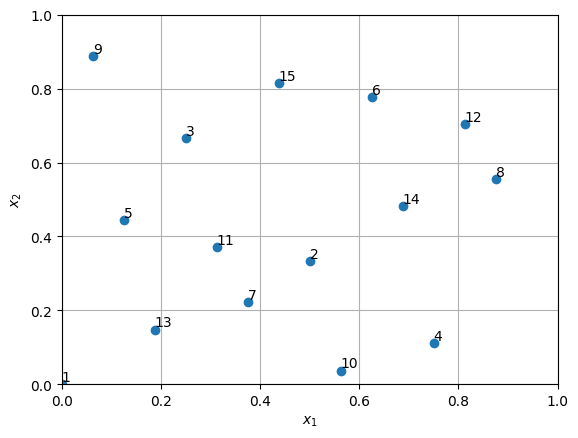

In [62]:
dimension = 2 # number of dimensions
num_points = 15 # number of points to generate

x = halton_sequence(num_points=num_points, dimension=dimension) # generate sequence of points

# plotting
fig, ax = plt.subplots()
ax.plot(x[:, 0], x[:, 1], "o")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.grid()

# Annotate sample number
for i in range(num_points):
    ax.annotate(f'{i+1}', x[i,:], ha="left", va="bottom")

Note the number corresponding to each point in the above plot. It shows the order in which samples are generated. The first point is at (0.0,0.0), second point is at (0.5,0.33), and so on. This sequence is same everytime samples are generated unless scrambling is used. Also, the `halton_sequence` function always generates samples in the unit hypercube. You will have to scale the samples to desired bounds, if required. This concludes the sampling plan section. `pyDOE3` has many other sampling methods, feel free to check them out.